In [45]:
# from sklearn.datasets import load_boston

from sklearn.datasets import fetch_california_housing
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

%matplotlib inline

# Gather Data

[Source: Orignal research paper](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)

In [3]:
california_dataset = fetch_california_housing()

In [4]:
type(california_dataset)

sklearn.utils._bunch.Bunch

In [5]:
california_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
dir(california_dataset)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [7]:
print(california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## Data points and Features

In [8]:
type(california_dataset.data)

numpy.ndarray

In [9]:
california_dataset.data.shape

(20640, 8)

In [10]:
california_dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [11]:
california_dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

# Data Exploration with pandas dataframes 

In [12]:
data = pd.DataFrame(data = california_dataset.data, columns = california_dataset.feature_names)

 # Add column with the price (target)
data['PRICE']= california_dataset.target

In [13]:
data.head() # the top rows look like this 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
data.tail() # Rows at bottom of dataframes

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [15]:
data.count()

MedInc        20640
HouseAge      20640
AveRooms      20640
AveBedrms     20640
Population    20640
AveOccup      20640
Latitude      20640
Longitude     20640
PRICE         20640
dtype: int64

In [16]:
pd.isnull(data).any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
PRICE         False
dtype: bool

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Visulising Data Histograms, Distributions and Barcharts

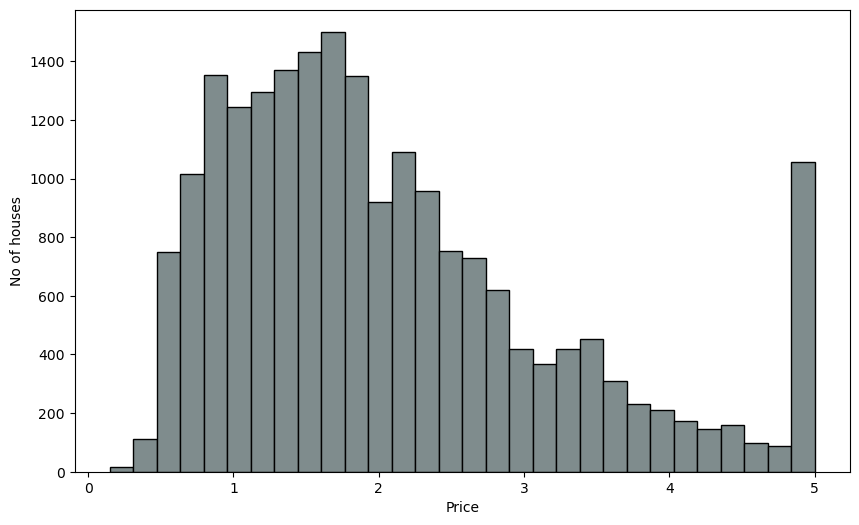

In [18]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins=30, edgecolor = 'black', color = '#7f8c8d')
plt.xlabel("Price")
plt.ylabel("No of houses")
plt.show()

C:\Users\premier\AppData\Local\Temp\ipykernel_6872\4137150028.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PRICE'], bins = 50, hist = False, kde = True, color = '#e74c3c')


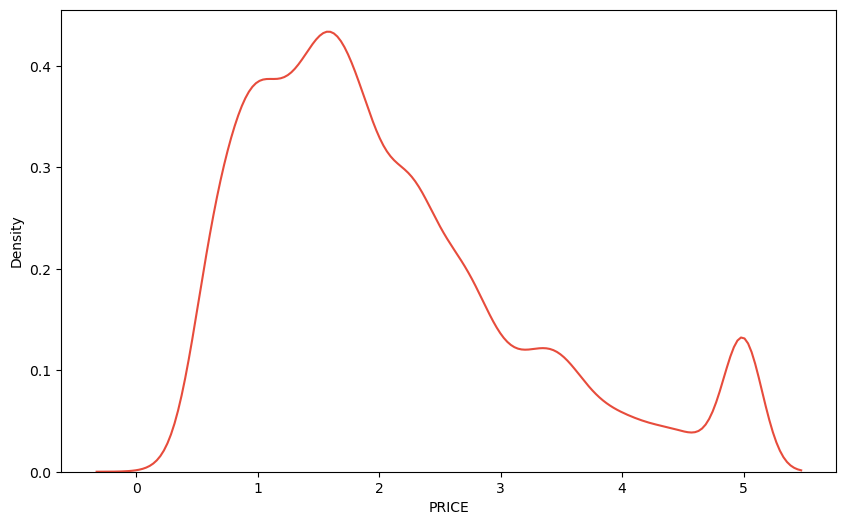

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'], bins = 50, hist = False, kde = True, color = '#e74c3c')
plt.show()

In [20]:
data['AveRooms'].value_counts()

AveRooms
5.000000    27
4.500000    22
4.000000    21
6.000000    20
5.333333    13
            ..
4.772480     1
5.322650     1
4.524664     1
4.262903     1
4.609329     1
Name: count, Length: 19392, dtype: int64

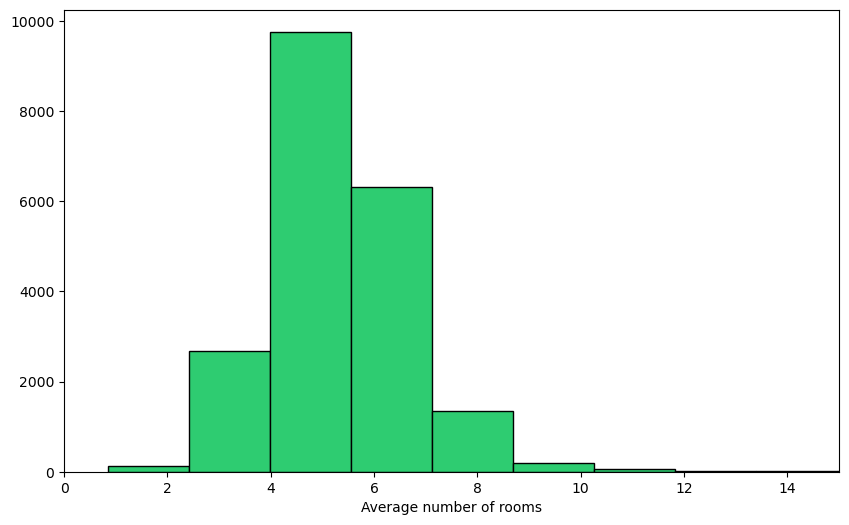

In [21]:
plt.figure(figsize=(10,6))
plt.hist(data['AveRooms'], edgecolor = 'black', color = '#2ecc71', bins=90)
plt.xlabel('Average number of rooms')
plt.xlim(0,15)
plt.show()

In [22]:
data['AveRooms'].mean()

np.float64(5.428999742190376)

In [23]:
data['AveBedrms'].mean()

np.float64(1.096675149606208)

In [24]:
data['Population'].mean()

np.float64(1425.4767441860465)

In [25]:
data['HouseAge'].mean()

np.float64(28.639486434108527)

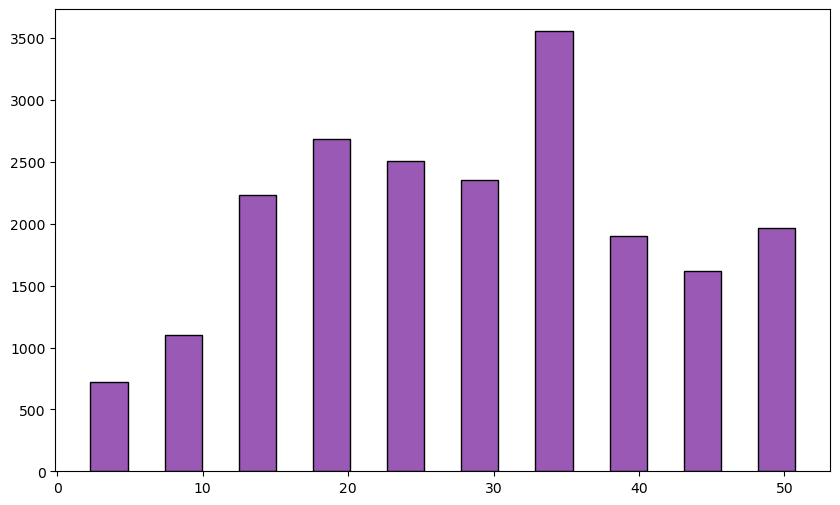

In [26]:
plt.figure(figsize=(10,6))
plt.hist(data['HouseAge'], edgecolor = 'black', color = '#9b59b6', rwidth = 0.5)
# sns.distplot(data['HouseAge'], color = '#3498db')
plt.show()

In [27]:
data['HouseAge']

0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: HouseAge, Length: 20640, dtype: float64

C:\Users\premier\AppData\Local\Temp\ipykernel_6872\3950092204.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Population'], color = '#8e44ad')


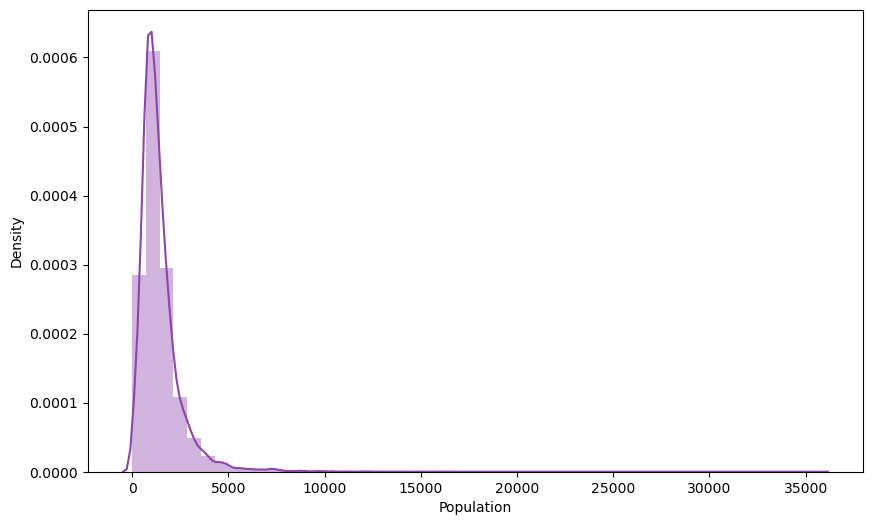

In [28]:
plt.figure(figsize=(10,6))
sns.distplot(data['Population'], color = '#8e44ad')
plt.show()

In [29]:
data['Population'].value_counts()

Population
891.0     25
1052.0    24
761.0     24
850.0     24
1227.0    24
          ..
3700.0     1
5558.0     1
6437.0     1
6242.0     1
5534.0     1
Name: count, Length: 3888, dtype: int64

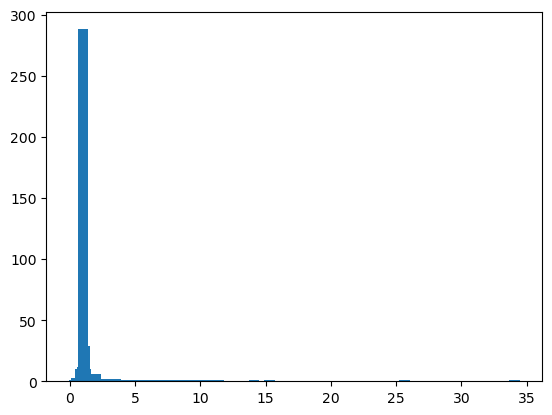

In [30]:
frequency = data['AveBedrms'].value_counts()
# frequency.index
# type(frequency)
# frequency.axes[0]
plt.bar(frequency.index, height=frequency)
plt.show()

# Descriptive Statistics

In [31]:
data['PRICE'].min()

0.14999

In [32]:
data['PRICE'].max()

5.00001

In [33]:
data['PRICE'].mean()

np.float64(2.068558169089147)

In [34]:
data['PRICE'].median()

1.797

In [35]:
data.min()

MedInc          0.499900
HouseAge        1.000000
AveRooms        0.846154
AveBedrms       0.333333
Population      3.000000
AveOccup        0.692308
Latitude       32.540000
Longitude    -124.350000
PRICE           0.149990
dtype: float64

In [36]:
data.max()

MedInc           15.000100
HouseAge         52.000000
AveRooms        141.909091
AveBedrms        34.066667
Population    35682.000000
AveOccup       1243.333333
Latitude         41.950000
Longitude      -114.310000
PRICE             5.000010
dtype: float64

In [37]:
data.mean()

MedInc           3.870671
HouseAge        28.639486
AveRooms         5.429000
AveBedrms        1.096675
Population    1425.476744
AveOccup         3.070655
Latitude        35.631861
Longitude     -119.569704
PRICE            2.068558
dtype: float64

In [38]:
data.median()

MedInc           3.534800
HouseAge        29.000000
AveRooms         5.229129
AveBedrms        1.048780
Population    1166.000000
AveOccup         2.818116
Latitude        34.260000
Longitude     -118.490000
PRICE            1.797000
dtype: float64

In [39]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Correlation 
## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho {XY} \leq +1.0 $$

In [40]:
data['PRICE'].corr(data['AveRooms'])

np.float64(0.15194828974145783)

In [41]:
data['PRICE'].corr(data['HouseAge'])

np.float64(0.10562341249320996)

In [42]:
data['PRICE'].corr(data['AveOccup'])

np.float64(-0.02373741295613433)

In [43]:
 data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
PRICE,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [49]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

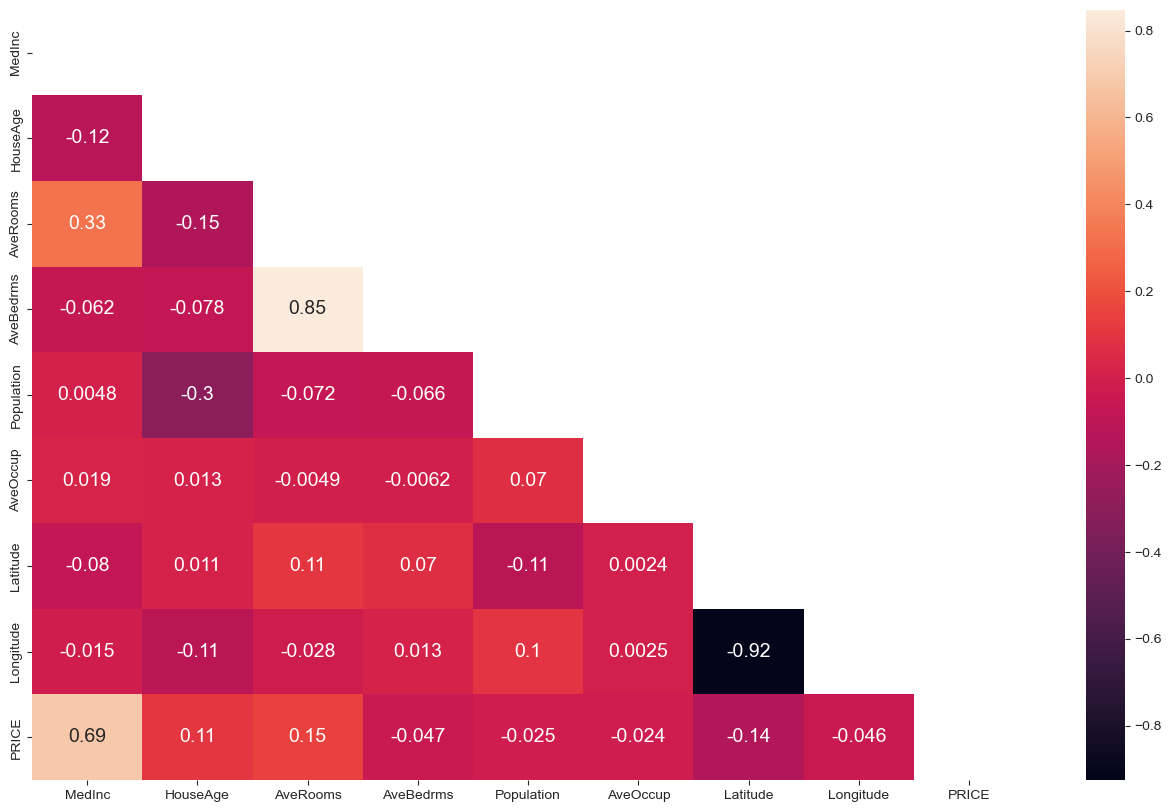

In [62]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(), mask = mask, annot=True, annot_kws = {"size":14})
sns.set_style('white')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

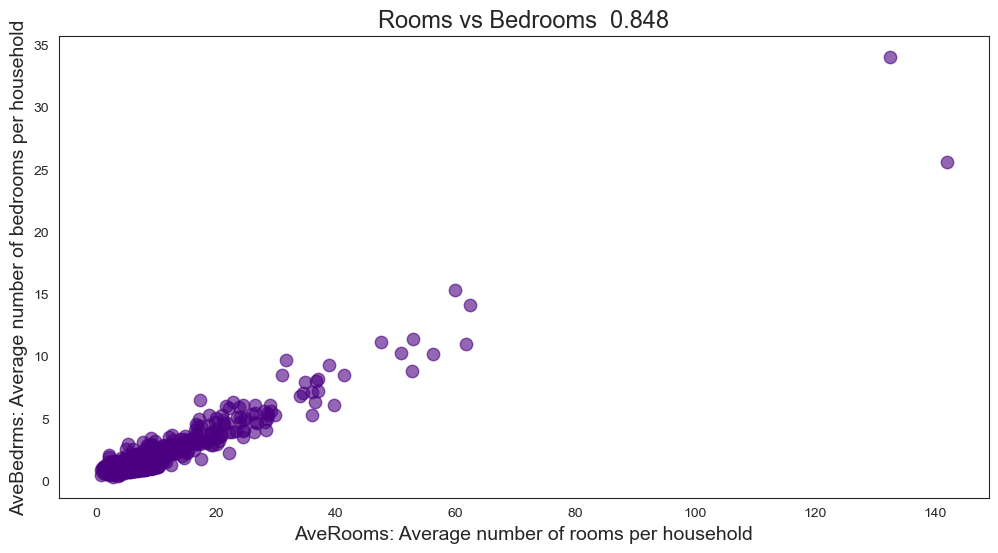

In [102]:
r_br_corr = round(data['AveRooms'].corr(data['AveBedrms']), 3)

plt.figure(figsize=(12,6))
plt.scatter(x=data['AveRooms'], y=data['AveBedrms'], alpha= 0.6, s=80, color='indigo')
plt.title(f'Rooms vs Bedrooms  {r_br_corr}', fontsize = 17)
plt.xlabel('AveRooms: Average number of rooms per household', fontsize = 14)
plt.ylabel('AveBedrms: Average number of bedrooms per household', fontsize = 14)
plt.show()

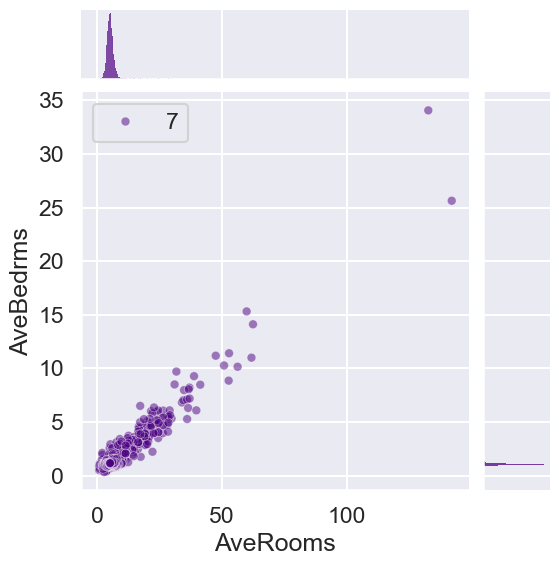

In [124]:
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
sns.jointplot(x=data['AveRooms'], y=data['AveBedrms'], size=7, color='indigo', joint_kws={'alpha': 0.5})
plt.show()

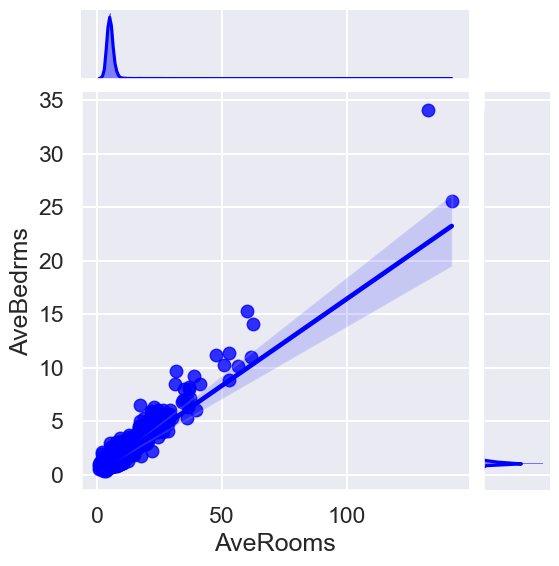

In [130]:
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
sns.jointplot(x=data['AveRooms'], y=data['AveBedrms'], color='blue', kind="reg")
plt.show()